# Cleaning & Editing

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train_arabam.csv').drop(columns='Unnamed: 0')

In [3]:
train

,price_try,make,series,model,year,km,transmission,fuel,body_type,warranty,...,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
0,364950,Peugeot,307,1.6 Premium,2003,149000,Düz,LPG & Benzin,Hatchback/5,Garantisi Yok,...,4.0,147.0,1587,110,NaN,NaN,"11,6",190.0,"7,2",Belirtilmemiş
1,769950,BMW,5 Serisi,520d Premium,2008,369000,Otomatik,Dizel,Sedan,Garantisi Yok,...,4.0,350.0,1995,177,4000.0,1750.0,"8,4",226.0,"6,1",Tamamı orjinal
2,635000,Ford,Focus,1.6 TDCi Trend X,2012,210000,Düz,Dizel,Sedan,Garantisi Yok,...,4.0,230.0,1560,95,3600.0,2000.0,"12,5",180.0,"4,2",Tamamı orjinal
3,1760000,Mercedes - Benz,A,A 180 Progressive,2020,38000,Yarı Otomatik,Benzin,Sedan,NaN,...,4.0,200.0,1332,136,5500.0,1460.0,"9,3",216.0,"5,3",Tamamı orjinal
4,850000,Renault,Megane,1.2 TCe Joy,2021,30000,Düz,Benzin,Sedan,NaN,...,4.0,205.0,1198,130,5500.0,2000.0,"10,3",200.0,"5,4",Belirtilmemiş
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,635000,Seat,Ibiza,1.4 Style,2012,137000,Düz,Benzin,Hatchback/5,-,...,4.0,132.0,1390,85,5000.0,3800.0,"11,8",177.0,"5,9",3 boyalı
1496,275000,Fiat,Palio,1.6 HL,1999,256000,Düz,LPG & Benzin,Hatchback/5,NaN,...,4.0,140.0,1581,100,5750.0,4000.0,"10,3",186.0,"8,3",12 boyalı
1497,662000,Renault,Clio,0.9 TCe Joy,2020,42000,Düz,Benzin,Hatchback/5,NaN,...,3.0,140.0,898,90,5000.0,2500.0,"12,9",178.0,5,Tamamı orjinal
1498,610000,Ford,Focus,1.6 Ghia,2006,200000,Düz,LPG & Benzin,Sedan,NaN,...,4.0,155.0,1596,115,6000.0,4150.0,"10,8",190.0,"6,4",Tamamı orjinal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_try                    1500 non-null   object 
 1   make                         1500 non-null   object 
 2   series                       1500 non-null   object 
 3   model                        1500 non-null   object 
 4   year                         1500 non-null   object 
 5   km                           1500 non-null   int64  
 6   transmission                 1500 non-null   object 
 7   fuel                         1500 non-null   object 
 8   body_type                    1500 non-null   object 
 9   warranty                     1046 non-null   object 
 10  from_                        1500 non-null   object 
 11  wheel_drive                  1485 non-null   object 
 12  cylinder_number              1452 non-null   float64
 13  torque_nm         

In [5]:
train.corr()

,km,cylinder_number,torque_nm,max_power_rpm,min_power_rpm,max_speed_kmh
km,1.000000,0.196653,0.038697,-0.175886,-0.028017,-0.024003
cylinder_number,0.196653,1.000000,0.343964,-0.056815,0.022903,0.281674
torque_nm,0.038697,0.343964,1.000000,-0.550216,-0.506992,0.694015
max_power_rpm,-0.175886,-0.056815,-0.550216,1.000000,0.815319,0.018590
min_power_rpm,-0.028017,0.022903,-0.506992,0.815319,1.000000,-0.046457
max_speed_kmh,-0.024003,0.281674,0.694015,0.018590,-0.046457,1.000000


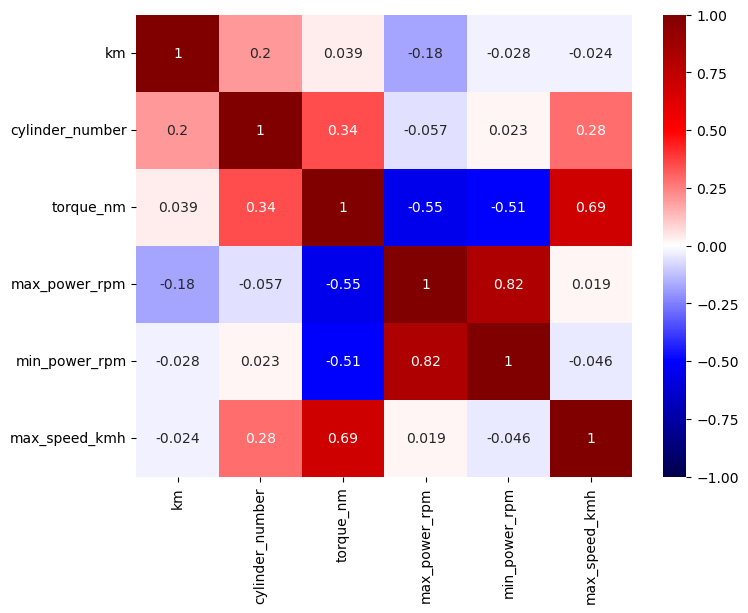

In [6]:
plt.figure(figsize=[8,6])
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [7]:
train['engine_capacity_cc'].unique()

array(['1587', '1995', '1560', '1332', '1198', '1248', '1398', '1461',
       '1199', '1598', '1422', '1597', '1364', '1499', '1595', '1493',
       '1395', '1596', '1388', '1496', '999', '1582', '1401 - 1600 cm3',
       '1390', '1468', '1229', '1590', '1329', '1498', '1149', '2599',
       '1950', '1339', '1581', '1801 - 2000 cm3', '1368', '898', '2993',
       '1968', '1197', '1399', '1275', '2143', '1896', '3982', '1206',
       '1389', '1599', '2494', '2720', '1324', '1289', '1240', '1987',
       '1242', '998', '1396', '1500', '1201 - 1400 cm3', '1998', '1400',
       '1997', '1796', '1372', '1798', nan, '1490', '5001 - 5500 cm3',
       '2979', '3518', '1397', '1360', '1991', '1296', '1591', '1592',
       '1318', '1781', '2967', '1984', '4966', '2001 - 2500 cm3', '-',
       '1497', '2501 - 3000 cm3', '1086', '4266', '1580', '2457', '1193',
       '3430', '6748', '1108', '1589', '2068', '1489', '1495', '1341',
       '1996', '1298', '1588', '1365', '1834', '1300', '2685', '1297

In [8]:
train['engine_capacity_cc'] = train['engine_capacity_cc'].str.extract('(\d+)')

In [9]:
train[train['engine_capacity_cc'].isna()]

,price_try,make,series,model,year,km,transmission,fuel,body_type,warranty,...,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
300,540000,Opel,Corsa,1.2 Twinport Enjoy,2014,150000,Düz,LPG & Benzin,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
642,1226008,Opel,Corsa-e,Ultimate,2023,7008,Otomatik,Elektrik,Hatchback/5,Garantisi Var,...,NaN,260.0,NaN,136,NaN,NaN,"8,1",150.0,NaN,Tamamı orjinal
760,375000,Renault,Clio,1.4 RNA,2002,244000,Düz,LPG & Benzin,Sedan,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
763,470000,Renault,Megane,1.4 Authentique,2007,182000,Düz,LPG & Benzin,Sedan,-,...,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,"2 değişen, 3 boyalı"
787,750000,Volkswagen,Jetta,1.4 TSi Highline,2012,214000,Düz,Benzin,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
872,110000,Skoda,Forman,135 L,1993,500000,Düz,LPG & Benzin,Cabrio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
873,175000,Tofaş,Şahin,1.6,1996,55,Düz,LPG & Benzin,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belirtilmemiş
883,428000,Ford,Fusion,1.4 TDCi Comfort,2006,159500,Düz,Dizel,Hatchback/5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 boyalı
894,650000,Volkswagen,Polo,1.2 Trendline,2012,120000,Düz,Benzin,Hatchback/3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 boyalı
931,880000,Volvo,S80,2.4 D5 VIP,2008,340000,Otomatik,Dizel,Sedan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4 değişen, 2 boyalı"


In [10]:
engine_capacity_dict = {
    '1.2 Twinport Enjoy': '1200',
    'Ultimate': '1520',
    '1.4 Authentique': '1400',
    '1.4 TSi Highline': '1400',
    '135 L': '1300',
    '1.6': '1600',
    '1.4 TDCi Comfort': '1400',
    '1.2 Trendline': '1200',
    '2.4 D5 VIP': '2400',
    '1.6 EX Advance': '1600',
    '1.4 RNA': '1400',
    '1.4 X-Line': '1400',
    '2.0 HDi ST': '2000',
    'Grande 1.4 Fire Active': '1400',
    '1.6 Europa RT': '1600',
    '1.6 i-VTEC Eco Executive': '1600',
    '1.6 XEi': '1600',
    '500 1.3 Mjet Lounge': '1300',
    '1.6 TDCi Titanium': '1600',
    '4S Performance Plus': '1520'
}

train['engine_capacity_cc'] = train['engine_capacity_cc'].fillna(train['model'].map(engine_capacity_dict))

In [11]:
train['engine_capacity_cc'][300]

'1200'

In [12]:
train['engine_capacity_cc'] = train['engine_capacity_cc'].astype(int)

In [13]:
train['engine_capacity_cc'].isna().sum()

0

In [14]:
train['engine_capacity_cc'].unique()

array([1587, 1995, 1560, 1332, 1198, 1248, 1398, 1461, 1199, 1598, 1422,
       1597, 1364, 1499, 1595, 1493, 1395, 1596, 1388, 1496,  999, 1582,
       1401, 1390, 1468, 1229, 1590, 1329, 1498, 1149, 2599, 1950, 1339,
       1581, 1801, 1368,  898, 2993, 1968, 1197, 1399, 1275, 2143, 1896,
       3982, 1206, 1389, 1599, 2494, 2720, 1324, 1289, 1240, 1987, 1242,
        998, 1396, 1500, 1201, 1998, 1400, 1997, 1796, 1372, 1798, 1200,
       1490, 5001, 2979, 3518, 1397, 1360, 1991, 1296, 1591, 1592, 1318,
       1781, 2967, 1984, 4966, 2001, 1520, 1497, 2501, 1086, 4266, 1580,
       2457, 1193, 3430, 6748, 1108, 1589, 2068, 1489, 1495, 1341, 1996,
       1300, 1600, 1298, 1588, 1365, 2400, 1834, 2000, 2685, 1297, 1601,
       1948, 1405, 2997, 3222, 1956, 1565, 1859])

# -------------------------------------------------------------------------------------------

In [15]:
train['cylinder_number'].unique()

array([ 4.,  3., nan,  6.,  8.,  5.])

In [16]:
train[train['cylinder_number'] == 8.0]['engine_capacity_cc'].min()

2997

In [17]:
train[train['cylinder_number'] == 6.0]['engine_capacity_cc'].min()

1991

In [18]:
train[train['cylinder_number'] == 5.0]['engine_capacity_cc'].min()

1984

In [19]:
train[train['cylinder_number'] == 4.0]['engine_capacity_cc'].min()

998

In [20]:
train[train['cylinder_number'] == 3.0]['engine_capacity_cc'].min()

898

In [21]:
cylinder_list= []

for index, row in train.iterrows():
    if row['engine_capacity_cc'] >= 2997:
        cylinder_list.append(8)
    elif row['engine_capacity_cc'] >= 1991:
        cylinder_list.append(6)
    elif row['engine_capacity_cc'] >= 1984:
        cylinder_list.append(5)
    elif row['engine_capacity_cc'] >= 998:
        cylinder_list.append(4)
    elif row['engine_capacity_cc'] >= 898:
        cylinder_list.append(3)
    else:
        cylinder_list.append(row['cylinder_number'])
        
cylinder_series = pd.Series(cylinder_list)

train['cylinder_number'] = train['cylinder_number'].fillna(cylinder_series)

In [22]:
cylinder_series[330]

8

In [23]:
train['cylinder_number'][330]

8.0

In [24]:
train['cylinder_number'] = train['cylinder_number'].astype(int)

In [25]:
train['cylinder_number'].isna().sum()

0

In [26]:
train['cylinder_number'].unique()

array([4, 3, 6, 8, 5])

# -------------------------------------------------------------------------------------------

In [27]:
train['torque_nm'].unique()

array([147., 350., 230., 200., 205., 150., 240., 118., 250., 133., 320.,
       170., 152., 210., 146., 128., 270., 160., 300., 260., 151.,  nan,
       220., 110., 185., 255., 105., 127., 400., 235., 122., 148., 125.,
       140., 380., 520., 120., 175., 280., 103., 500., 155., 156., 190.,
       131., 112., 700., 114., 143., 221., 435., 102., 106., 115., 196.,
       135., 142., 145.,  90., 180., 126., 104., 285.,  95., 450., 340.,
       107., 153., 138., 550., 100., 195., 130., 172., 116., 254., 204.,
       216., 121., 154., 262., 123., 132., 137., 159., 117., 650., 370.,
       460., 111., 310., 136., 101., 144., 475., 392., 360., 141., 181.,
       600., 186., 134., 290., 124., 184.,  99., 157., 149., 165., 119.,
       188., 215., 174.,  92., 182.,  85.,  93., 158.,  97., 225., 470.,
       178., 206., 173.])

In [28]:
torque_list= []

for index, row in train.iterrows():
    if row['engine_capacity_cc'] >= 6000:
        torque_list.append(600)
    elif row['engine_capacity_cc'] >= 5000:
        torque_list.append(500)
    elif row['engine_capacity_cc'] >= 2500:
        torque_list.append(250)
    elif row['engine_capacity_cc'] >= 2400:
        torque_list.append(240)
    elif row['engine_capacity_cc'] >= 1990:
        torque_list.append(200)
    elif row['engine_capacity_cc'] >= 1780:
        torque_list.append(180)
    elif row['engine_capacity_cc'] >= 1560:
        torque_list.append(150)
    elif row['engine_capacity_cc'] >= 1380:
        torque_list.append(140)
    elif row['engine_capacity_cc'] >= 1280:
        torque_list.append(130)
    elif row['engine_capacity_cc'] >= 1200:
        torque_list.append(120)
    elif row['engine_capacity_cc'] >= 1100:
        torque_list.append(110)
    else:
        torque_list.append(row['torque_nm'])
        
torque_series = pd.Series(torque_list)

train['torque_nm'] = train['torque_nm'].fillna(torque_series)

In [29]:
torque_series[34]

140.0

In [30]:
train['torque_nm'][34]

140.0

In [31]:
train['torque_nm'] = train['torque_nm'].astype(int)

In [32]:
train['torque_nm'].isna().sum()

0

In [33]:
train['torque_nm'].unique()

array([147, 350, 230, 200, 205, 150, 240, 118, 250, 133, 320, 170, 152,
       210, 146, 128, 270, 160, 300, 260, 151, 140, 220, 110, 185, 255,
       105, 127, 400, 235, 122, 180, 148, 125, 380, 520, 120, 175, 280,
       103, 500, 155, 156, 190, 131, 112, 700, 114, 143, 221, 435, 102,
       106, 115, 196, 135, 142, 145,  90, 126, 104, 285,  95, 450, 340,
       107, 153, 138, 550, 100, 195, 130, 172, 116, 254, 204, 216, 121,
       154, 262, 123, 132, 137, 159, 117, 650, 370, 460, 111, 310, 136,
       101, 144, 475, 392, 600, 360, 141, 181, 186, 134, 290, 124, 184,
        99, 157, 149, 165, 119, 188, 215, 174,  92, 182,  85,  93, 158,
        97, 225, 470, 178, 206, 173])

# -------------------------------------------------------------------------------------------

In [34]:
train['engine_power_hp'].unique()

array(['110', '177', '95', '136', '130', '71', '83', '115', '90', '100',
       '75', '125', '150', '96', '86', '116', '70', '120', '105', '128',
       '51 - 75 HP', '140', '85', '80', '170', '225', '99', '160', '166',
       '194', '126 - 150 HP', '102', '132', '184', '231', '156', '97',
       '107', '68', '204', '469', '84', '178', '109', '106', '207', '64',
       '240', '77', '152', '89', '180', '114', '121', '65', '93', '143',
       '76 - 100 HP', '163', '151 - 175 HP', '81', '142', '112', '131',
       '218', '129', nan, '98', '60', '265', '551 - 575 HP', '431', '252',
       '190', '55', '122', '91', '258', '72', '113', '87',
       "50 HP'ye kadar", '88', '124', '127', '101 - 125 HP',
       '201 - 225 HP', '82', '76', '54', '313', '306', '250', '74', '101',
       '123', '251 - 275 HP', '111', '66', '279', '103', '381', '280',
       '211', '-', '69', '57', '286', '155', '133', '92', '135', '175',
       '78', '117', '158', '73', '94', '139', '147', '197', '126', '571',
   

In [35]:
train['engine_power_hp'] = train['engine_power_hp'].str.extract('(\d+)')

In [36]:
engine_power_list= []

for index, row in train.iterrows():
    if row['engine_capacity_cc'] >= 6000:
        engine_power_list.append(500)
    elif row['engine_capacity_cc'] >= 2400:
        engine_power_list.append(175)
    elif row['engine_capacity_cc'] >= 2000:
        engine_power_list.append(150)
    elif row['engine_capacity_cc'] >= 1590:
        engine_power_list.append(125)
    elif row['engine_capacity_cc'] >= 1580:
        engine_power_list.append(115)
    elif row['engine_capacity_cc'] >= 1400:
        engine_power_list.append(100)
    elif row['engine_capacity_cc'] >= 1300:
        engine_power_list.append(95)
    elif row['engine_capacity_cc'] >= 1200:
        engine_power_list.append(75)
    else:
        engine_power_list.append(row['engine_power_hp'])
        
engine_power_series = pd.Series(engine_power_list)

train['engine_power_hp'] = train['engine_power_hp'].fillna(engine_power_series)

In [37]:
engine_power_series[740]

500

In [38]:
train['engine_power_hp'][740]

500

In [39]:
train['engine_power_hp'] = train['engine_power_hp'].astype(int)

In [40]:
train['engine_power_hp'].isna().sum()

0

In [41]:
train['engine_power_hp'].unique()

array([110, 177,  95, 136, 130,  71,  83, 115,  90, 100,  75, 125, 150,
        96,  86, 116,  70, 120, 105, 128,  51, 140,  85,  80, 170, 225,
        99, 160, 166, 194, 126, 102, 132, 184, 231, 156,  97, 107,  68,
       204, 469,  84, 178, 109, 106, 207,  64, 240,  77, 152,  89, 180,
       114, 121,  65,  93, 143,  76, 163, 151,  81, 142, 112, 131, 218,
       129,  98,  60, 265, 551, 431, 252, 190,  55, 122,  91, 258,  72,
       113,  87,  50,  88, 124, 127, 101, 201,  82,  54, 313, 306, 250,
        74, 123, 251, 111,  66, 279, 103, 381, 280, 211, 500,  69,  57,
       286, 155, 133, 175,  92, 135,  78, 117, 158,  73,  94, 139, 147,
       197, 571, 192])

# -------------------------------------------------------------------------------------------

In [42]:
train['max_power_rpm'].unique()

array([  nan, 4000., 3600., 5500., 5750., 3500., 3800., 6500., 5000.,
       6000., 3250., 4400., 4200., 5600., 3750., 6200., 6300., 5700.,
       6400., 4800., 5300., 4600., 5400., 5800., 4350., 3000., 5200.,
       6600., 2500., 6250., 3200., 6450., 5250., 5100., 3900., 4500.,
       4900., 6700.])

In [43]:
max_power_list= []

for index, row in train.iterrows():
    if row['torque_nm'] >= 650:
        max_power_list.append(6500)
    elif row['torque_nm'] >= 600:
        max_power_list.append(6000)
    elif row['torque_nm'] >= 500:
        max_power_list.append(5000)
    elif row['torque_nm'] >= 400:
        max_power_list.append(4000)
    elif row['torque_nm'] >= 300:
        max_power_list.append(3000)
    elif row['torque_nm'] >= 80:
        max_power_list.append(2500)
    else:
        max_power_list.append(row['max_power_rpm'])
        
max_power_series = pd.Series(max_power_list)

train['max_power_rpm'] = train['max_power_rpm'].fillna(max_power_series)

In [44]:
max_power_series[18]

2500

In [45]:
train['max_power_rpm'][18]

2500.0

In [46]:
train['max_power_rpm'] = train['max_power_rpm'].astype(int)

In [47]:
train['max_power_rpm'].isna().sum()

0

In [48]:
train['max_power_rpm'].unique()

array([2500, 4000, 3600, 5500, 5750, 3500, 3800, 6500, 5000, 6000, 3250,
       4400, 4200, 5600, 3750, 6200, 6300, 5700, 6400, 4800, 5300, 4600,
       5400, 5800, 4350, 3000, 5200, 6600, 6250, 3200, 6450, 5250, 5100,
       3900, 4500, 4900, 6700])

# -------------------------------------------------------------------------------------------

In [49]:
train['min_power_rpm'].unique()

array([  nan, 1750., 2000., 1460., 1500., 2750., 1800., 2250., 4200.,
       4000., 1900., 4300., 4250., 2500., 3500., 3600., 4800., 3800.,
       1700., 1600., 3250., 4400., 4500., 1400., 4700., 1550., 1250.,
       3000., 1350., 5500., 1200., 3750., 2800., 4600., 1850., 3950.,
       3200., 5250., 4850., 2600., 5000., 2900., 3400., 1450., 2700.,
       3900., 5200., 4150.])

In [50]:
min_power_list= []

for index, row in train.iterrows():
    if row['max_power_rpm'] >= 6000:
        min_power_list.append(4500)
    elif row['max_power_rpm'] >= 5000:
        min_power_list.append(3500)
    elif row['max_power_rpm'] >= 4000:
        min_power_list.append(2000)
    elif row['max_power_rpm'] >= 2500:
        min_power_list.append(1200)
    else:
        min_power_list.append(row['min_power_rpm'])
        
min_power_series = pd.Series(min_power_list)

train['min_power_rpm'] = train['min_power_rpm'].fillna(min_power_series)

In [51]:
min_power_series[18]

1200

In [52]:
train['min_power_rpm'][18]

1200.0

In [53]:
train['min_power_rpm'] = train['min_power_rpm'].astype(int)

In [54]:
train['min_power_rpm'].isna().sum()

0

In [55]:
train['min_power_rpm'].unique()

array([1200, 1750, 2000, 1460, 1500, 2750, 1800, 2250, 4200, 4000, 1900,
       4300, 4250, 2500, 3500, 3600, 4800, 3800, 1700, 1600, 3250, 4400,
       4500, 1400, 4700, 1550, 1250, 3000, 1350, 5500, 3750, 2800, 4600,
       1850, 3950, 3200, 5250, 4850, 2600, 5000, 2900, 3400, 1450, 2700,
       3900, 5200, 4150])

# -------------------------------------------------------------------------------------------

In [56]:
train['acceleration_0to100_sec'] = train['acceleration_0to100_sec'].str.replace(',', '.').astype(float)

In [57]:
train['acceleration_0to100_sec'].unique()

array([11.6,  8.4, 12.5,  9.3, 10.3, 12.6, 13.8, 15.4, 11.5, 12.2,  9.8,
       10.9, 10.7, 14.8, 10.1, 14.5,  8.9, 13.9, 12.8, 10.6, 10.8, 14.9,
        9.9, 10.2, 11.8, 11.7,  nan,  8.8, 12.3, 12. , 13. , 12.7,  7.3,
       11.3, 13.1,  9.1, 13.5,  8.3,  7.5, 13.6, 12.4, 11.1,  8.6,  7.6,
       12.9,  8.1,  7.8,  8.5, 15.2,  9.6, 15. , 11. , 14.7,  9.7,  7.9,
       11.9, 14.1,  9.2,  7.7,  4.9, 13.3, 13.2, 11.2,  8.2, 14.6, 11.4,
        6.5, 17.9, 10. , 13.4, 14.2, 10.5, 15.9,  9.5,  9.4, 16.5, 10.4,
       17.1,  7. ,  9. , 15.6, 12.1, 16. ,  6.3, 44. , 14. , 13.7, 14.3,
       15.3,  7.2, 16.4, 17. ,  8.7,  5.1, 15.5, 17.3,  6.2,  7.1,  4.2,
        5.4, 15.8, 15.1, 18. ,  5.9,  8. , 17.8, 16.7, 16.9, 16.2,  4. ])

In [58]:
acceleration_list= []

for index, row in train.iterrows():
    if row['torque_nm'] >= 600:
        acceleration_list.append(5.9)
    elif row['torque_nm'] >= 500:
        acceleration_list.append(7.9)
    elif row['torque_nm'] >= 400:
        acceleration_list.append(9.3)
    elif row['torque_nm'] >= 300:
        acceleration_list.append(11.2)
    elif row['torque_nm'] >= 200:
        acceleration_list.append(13.6)
    elif row['torque_nm'] >= 90:
        acceleration_list.append(15.2)
    else:
        acceleration_list.append(row['acceleration_0to100_sec'])
        
acceleration_series = pd.Series(acceleration_list)

train['acceleration_0to100_sec'] = train['acceleration_0to100_sec'].fillna(acceleration_series)

In [59]:
acceleration_series[34]

15.2

In [60]:
train['acceleration_0to100_sec'][34]

15.2

In [61]:
train['acceleration_0to100_sec'].isna().sum()

0

In [62]:
train['acceleration_0to100_sec'].unique()

array([11.6,  8.4, 12.5,  9.3, 10.3, 12.6, 13.8, 15.4, 11.5, 12.2,  9.8,
       10.9, 10.7, 14.8, 10.1, 14.5,  8.9, 13.9, 12.8, 10.6, 10.8, 14.9,
        9.9, 10.2, 11.8, 11.7, 15.2,  8.8, 12.3, 12. , 13. , 12.7,  7.3,
       11.3, 13.1,  9.1, 13.5,  8.3, 13.6,  7.5, 12.4, 11.1,  8.6,  7.6,
       12.9,  8.1,  7.8,  8.5,  9.6, 15. , 11. , 14.7,  9.7,  7.9, 11.9,
       14.1,  9.2,  7.7,  4.9, 13.3, 13.2, 11.2,  8.2, 14.6, 11.4,  6.5,
       17.9, 10. , 13.4, 14.2, 10.5, 15.9,  9.5,  9.4, 16.5, 10.4, 17.1,
        7. ,  9. , 15.6, 12.1, 16. ,  6.3, 44. , 14. , 13.7, 14.3, 15.3,
        7.2, 16.4, 17. ,  8.7,  5.1, 15.5, 17.3,  6.2,  7.1,  4.2,  5.4,
       15.8, 15.1,  5.9, 18. ,  8. , 17.8, 16.7, 16.9, 16.2,  4. ])

# -------------------------------------------------------------------------------------------

In [63]:
train['max_speed_kmh'].unique()

array([190., 226., 180., 216., 200., 182., 170., 165., 185., 178., 197.,
       184., 175., 203., 189., 163., 192., 218., 176., 166., 195., 162.,
       193., 206., 202., 183.,  nan, 168., 205., 177., 196., 171., 248.,
       214., 167., 164., 213., 239., 173., 230., 225., 238., 223., 198.,
       191., 188., 161., 210., 232., 250., 187., 220., 172., 186., 229.,
       150., 245., 145., 169., 212., 228., 155., 160., 194., 240., 174.,
       217., 204., 207., 235., 233., 199., 222., 219., 179., 181., 243.,
       157., 208., 211., 151., 159., 255., 215., 237., 209., 140., 241.,
       234., 227., 201., 156.])

In [64]:
max_speed_list= []

for index, row in train.iterrows():
    if row['torque_nm'] >= 600:
        max_speed_list.append(250)
    elif row['torque_nm'] >= 500:
        max_speed_list.append(245)
    elif row['torque_nm'] >= 400:
        max_speed_list.append(230)
    elif row['torque_nm'] >= 300:
        max_speed_list.append(200)
    elif row['torque_nm'] >= 200:
        max_speed_list.append(175)
    elif row['torque_nm'] >= 90:
        max_speed_list.append(155)
    else:
        max_speed_list.append(row['max_speed_kmh'])
        
max_speed_series = pd.Series(max_speed_list)

train['max_speed_kmh'] = train['max_speed_kmh'].fillna(max_speed_series)

In [65]:
max_speed_series[59]

175.0

In [66]:
train['max_speed_kmh'][59]

175.0

In [67]:
train['max_speed_kmh'] = train['max_speed_kmh'].astype(int)

In [68]:
train['max_speed_kmh'].isna().sum()

0

In [69]:
train['max_speed_kmh'].unique()

array([190, 226, 180, 216, 200, 182, 170, 165, 185, 178, 197, 184, 175,
       203, 189, 163, 192, 218, 176, 166, 195, 162, 193, 206, 202, 183,
       155, 168, 205, 177, 196, 171, 248, 214, 167, 164, 213, 239, 173,
       230, 225, 238, 223, 198, 191, 188, 161, 210, 232, 250, 187, 220,
       172, 186, 229, 150, 245, 145, 169, 212, 228, 160, 194, 240, 174,
       217, 204, 207, 235, 233, 199, 222, 219, 179, 181, 243, 157, 208,
       211, 151, 159, 255, 215, 237, 209, 140, 241, 234, 227, 201, 156])

# -------------------------------------------------------------------------------------------

In [70]:
train['average_fuel_consumption_lt'] = train['average_fuel_consumption_lt'].str.replace(',', '.').astype(float)

In [71]:
train['average_fuel_consumption_lt'].unique()

array([ 7.2,  6.1,  4.2,  5.3,  5.4,  4.5,  4.9,  4.4,  4.1,  3.5,  nan,
        4.8,  5.1,  3.9,  4.6,  7.1,  5.6,  7.6,  6.5,  4.7,  4. ,  7.5,
        5.5,  5. ,  4.3,  6.3,  3.6,  6. ,  6.7,  5.7,  7. ,  5.9,  3.7,
        5.8,  7.7,  6.2,  5.2,  8.2,  3.8,  6.9,  9.3,  7.9,  7.4,  6.8,
        6.6,  8.1,  8.9,  6.4,  7.3,  8.7, 11.6,  7.8, 10.2, 11.4,  9.4,
        8.4,  8. , 10.9, 10.1,  8.3,  9.7,  9. ,  8.5,  9.6,  9.2,  3.2,
        8.6])

In [72]:
fuel_consumption_list= []

for index, row in train.iterrows():
    if row['min_power_rpm'] >= 5000:
        fuel_consumption_list.append(7.4)
    elif row['min_power_rpm'] >= 4000:
        fuel_consumption_list.append(6.6)
    elif row['min_power_rpm'] >= 3000:
        fuel_consumption_list.append(6.5)
    elif row['min_power_rpm'] >= 2000:
        fuel_consumption_list.append(6.2)
    elif row['min_power_rpm'] >= 1000:
        fuel_consumption_list.append(5.5)
    else:
        fuel_consumption_list.append(row['average_fuel_consumption_lt'])
        
fuel_consumption_series = pd.Series(fuel_consumption_list)

train['average_fuel_consumption_lt'] = train['average_fuel_consumption_lt'].fillna(fuel_consumption_series)

In [73]:
fuel_consumption_series[59]

5.5

In [74]:
train['average_fuel_consumption_lt'][59]

5.5

In [75]:
train['average_fuel_consumption_lt'].isna().sum()

0

In [76]:
train['average_fuel_consumption_lt'].unique()

array([ 7.2,  6.1,  4.2,  5.3,  5.4,  4.5,  4.9,  4.4,  4.1,  3.5,  5.5,
        4.8,  5.1,  3.9,  4.6,  7.1,  5.6,  7.6,  6.5,  4.7,  4. ,  7.5,
        5. ,  4.3,  6.3,  3.6,  6. ,  6.7,  5.7,  7. ,  5.9,  3.7,  5.8,
        7.7,  6.2,  5.2,  8.2,  3.8,  6.9,  9.3,  7.9,  7.4,  6.8,  6.6,
        8.1,  8.9,  6.4,  7.3,  8.7, 11.6,  7.8, 10.2, 11.4,  9.4,  8.4,
        8. , 10.9, 10.1,  8.3,  9.7,  9. ,  8.5,  9.6,  9.2,  3.2,  8.6])

In [77]:
train['year'] = train['year'].str.extract('(\d+)')
train['year'] = train['year'].astype(int)

In [78]:
train['price_try'] = train['price_try'].str.extract('(\d+)')
train['price_try'] = train['price_try'].astype(int)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_try                    1500 non-null   int64  
 1   make                         1500 non-null   object 
 2   series                       1500 non-null   object 
 3   model                        1500 non-null   object 
 4   year                         1500 non-null   int64  
 5   km                           1500 non-null   int64  
 6   transmission                 1500 non-null   object 
 7   fuel                         1500 non-null   object 
 8   body_type                    1500 non-null   object 
 9   warranty                     1046 non-null   object 
 10  from_                        1500 non-null   object 
 11  wheel_drive                  1485 non-null   object 
 12  cylinder_number              1500 non-null   int64  
 13  torque_nm         

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [80]:
make_counts = train['make'].value_counts()

other_makes = list(make_counts[make_counts <= 30].index)

train['make'] = train['make'].replace(other_makes, 'Other')

In [81]:
series_counts = train['series'].value_counts()

other_series = list(series_counts[series_counts <20].index)

train['series'] = train['series'].replace(other_series, 'Other')

In [82]:
series_list= []

for index, row in train.iterrows():
    if row['series'] == 'Other':
        series_list.append('Other ' + row['make'])
    else:
        series_list.append(row['series'])
        
train['series'] = series_list

In [83]:
train['series'] = train['series'].apply(lambda x : x.replace("3 Serisi","3 Series"))
train['series'] = train['series'].apply(lambda x : x.replace("5 Serisi","5 Series"))

In [84]:
train.drop(columns='model', inplace=True)

In [85]:
transmission_dict = {
    'Düz': 'Manual',
    'Otomatik': 'Automatic',
    'Yarı Otomatik': 'Semiautomatic'
}

train['transmission'] = train.transmission.map(transmission_dict)

In [86]:
fuel_dict = {
    'Dizel': 'Diesel',
    'LPG & Benzin': 'LPG & Gasoline',
    'Benzin': 'Gasoline',
    'Elektrik': 'Electric'
}

train['fuel'] = train.fuel.map(fuel_dict)

In [87]:
train['fuel'].fillna('Gasoline', inplace=True)

In [88]:
body_dict = {
    'Sedan': 'Sedan',
    'Hatchback/5': 'Hatchback',
    'Station wagon': 'Other',
    'Hatchback/3': 'Hatchback',
    'Coupe': 'Other',
    'MPV': 'Other',
    'Cabrio': 'Other',
    '-': 'Other'
}

train['body_type'] = train.body_type.map(body_dict)

In [89]:
warranty_dict = {
    'Garantisi Yok': 'Warrantless',
    'Garantisi Var': 'Warranted',
    '-': 'Warrantless'
}

train['warranty'] = train.warranty.map(warranty_dict)

In [90]:
train['warranty'].fillna('Warrantless', inplace=True)

In [91]:
from_dict = {
    'Galeriden': 'Dealer',
    'Sahibinden': 'Owner',
    'Yetkili Bayiden': 'Authorized Dealer'
}

train['from_'] = train.from_.map(from_dict)

In [92]:
wheel_drive_dict = {
    'Önden Çekiş': 'Front-Wheel Drive',
    'Arkadan İtiş': 'Rear-Wheel Drive',
    '4WD (Sürekli)': '4WD (Continuous)',
    '-': 'Front-Wheel Drive'
}

train['wheel_drive'] = train.wheel_drive.map(wheel_drive_dict)

In [93]:
train['wheel_drive'].fillna('Front-Wheel Drive', inplace=True)

In [94]:
pc_counts = train['painted_changed'].value_counts()

pc = list(pc_counts[pc_counts <= 56].index)

train['painted_changed'] = train['painted_changed'].replace(pc, 'Painted or Changed')

In [95]:
pc_dict = {
    'Painted or Changed': 'Painted or Changed',
    'Belirtilmemiş': 'Original',
    'Tamamı orjinal': 'Original'
}

train['painted_changed'] = train.painted_changed.map(pc_dict)

# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

In [96]:
train.drop_duplicates(inplace=True)
train = train.reset_index(drop=True)
train

,price_try,make,series,year,km,transmission,fuel,body_type,warranty,from_,...,cylinder_number,torque_nm,engine_capacity_cc,engine_power_hp,max_power_rpm,min_power_rpm,acceleration_0to100_sec,max_speed_kmh,average_fuel_consumption_lt,painted_changed
0,364950,Peugeot,Other Peugeot,2003,149000,Manual,LPG & Gasoline,Hatchback,Warrantless,Dealer,...,4,147,1587,110,2500,1200,11.6,190,7.2,Original
1,769950,BMW,5 Series,2008,369000,Automatic,Diesel,Sedan,Warrantless,Dealer,...,4,350,1995,177,4000,1750,8.4,226,6.1,Original
2,635000,Ford,Focus,2012,210000,Manual,Diesel,Sedan,Warrantless,Dealer,...,4,230,1560,95,3600,2000,12.5,180,4.2,Original
3,1760000,Mercedes - Benz,Other Mercedes - Benz,2020,38000,Semiautomatic,Gasoline,Sedan,Warrantless,Owner,...,4,200,1332,136,5500,1460,9.3,216,5.3,Original
4,850000,Renault,Megane,2021,30000,Manual,Gasoline,Sedan,Warrantless,Owner,...,4,205,1198,130,5500,2000,10.3,200,5.4,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,635000,Seat,Other Seat,2012,137000,Manual,Gasoline,Hatchback,Warrantless,Owner,...,4,132,1390,85,5000,3800,11.8,177,5.9,Painted or Changed
1495,275000,Fiat,Other Fiat,1999,256000,Manual,LPG & Gasoline,Hatchback,Warrantless,Owner,...,4,140,1581,100,5750,4000,10.3,186,8.3,Painted or Changed
1496,662000,Renault,Clio,2020,42000,Manual,Gasoline,Hatchback,Warrantless,Owner,...,3,140,898,90,5000,2500,12.9,178,5.0,Original
1497,610000,Ford,Focus,2006,200000,Manual,LPG & Gasoline,Sedan,Warrantless,Owner,...,4,155,1596,115,6000,4150,10.8,190,6.4,Original


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_try                    1499 non-null   int64  
 1   make                         1499 non-null   object 
 2   series                       1499 non-null   object 
 3   year                         1499 non-null   int64  
 4   km                           1499 non-null   int64  
 5   transmission                 1499 non-null   object 
 6   fuel                         1499 non-null   object 
 7   body_type                    1499 non-null   object 
 8   warranty                     1499 non-null   object 
 9   from_                        1499 non-null   object 
 10  wheel_drive                  1499 non-null   object 
 11  cylinder_number              1499 non-null   int64  
 12  torque_nm                    1499 non-null   int64  
 13  engine_capacity_cc

In [98]:
train.to_csv('arabam_train.csv')